In [1]:
#Social_Network_Ads.csv

**Import libraries**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

**Importing the dataset**

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/ShubhamAgr09/Training-Datasets/main/Social_Network_Ads.csv')

**ENCODING**

In [4]:
df.Gender = df.Gender.map({'Male':1,'Female':0})

**EDA**

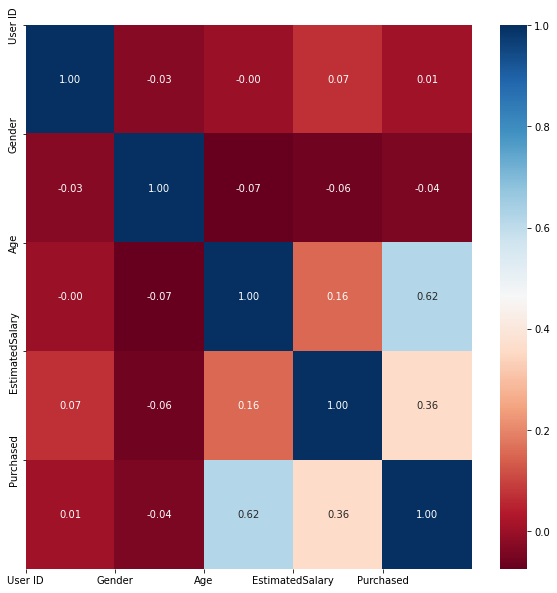

In [5]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr, cmap='RdBu', annot=True, fmt=".2f")
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

Dropping Age column as correlation between Age and Purchased represents non-linear relation.

**Splitting the dataset into the Training set and Test set**



In [6]:
X = df[['Age', 'EstimatedSalary']].values
y = df.iloc[:,-1].values

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2, random_state=2)

**Feature Scaling**

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Fitting SVM to the Training set**

In [9]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
svc.score(X_test,y_test)

0.9

**Predicting the Test set results**

In [10]:
y_pred = svc.predict(X_test)
svc.score(X_test,y_test)

0.9

**Making the Confusion Matrix**

In [11]:
from sklearn.metrics import classification_report, confusion_matrix

print('Classification Report')
print(classification_report(y_test, y_pred))
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.90      0.94      0.92        48
           1       0.90      0.84      0.87        32

    accuracy                           0.90        80
   macro avg       0.90      0.89      0.89        80
weighted avg       0.90      0.90      0.90        80

Confusion Matrix
[[45  3]
 [ 5 27]]


**Visualising the Training set results**

0.8793103448275863


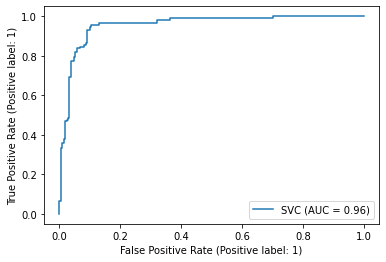

In [12]:
from sklearn.metrics import plot_roc_curve, roc_curve, roc_auc_score, confusion_matrix, f1_score

y_train_pred = svc.predict(X_train)
print(f1_score(y_train,svc.predict(X_train)))
fpr, tpr, thresholds = roc_curve(y_train, y_train_pred, pos_label=2)
plot_roc_curve(svc, X_train, y_train) # plot_roc_curve(model,X_test,y_test) - Syntax : plot_roc_curve(model,fts_of_test, target_of_test)

**Visualising the Test set results**

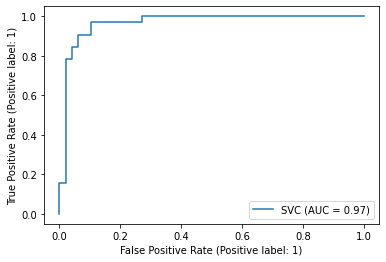

In [13]:
from sklearn.metrics import plot_roc_curve, roc_curve, roc_auc_score, confusion_matrix, f1_score

f1_score(y_test,svc.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=2)
plot_roc_curve(svc, X_test, y_test) # plot_roc_curve(model,X_test,y_test) - Syntax : plot_roc_curve(model,fts_of_test, target_of_test)